### Introduction to Time Series Data Analysis


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

In [48]:
df = pd.read_csv("../../Datasets/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")

In [49]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [50]:
df.shape

(35064, 18)

In [51]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [53]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [54]:
def convert_to_date(a,b,c,d):
	x = a + " " + b  + " " + c + " " + d
	return datetime.datetime.strptime(x, '%Y %m %d %H')

In [55]:
aq_df = pd.read_csv("../../Datasets/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv",parse_dates=[['year','month','day','hour']],date_parser=convert_to_date,keep_date_col=True)

/tmp/ipykernel_17646/3601883805.py:1: FutureWarning:


        Use pd.to_datetime instead.




In [56]:
aq_df.drop("No",axis=1,inplace=True)

In [57]:
aq_df.set_index(aq_df['year_month_day_hour'],inplace=True)
aq_df.drop("year_month_day_hour",axis=1,inplace=True)

In [58]:
import plotly.express as px
def slider_plot_with_time_series(column_name):
    fig = px.line(aq_df, x=aq_df.index, y=column_name, title=f'{column_name} with Slider')

    fig.update_xaxes(rangeslider_visible=True)
    # fig.show()

In [59]:
slider_plot_with_time_series("SO2")

In [60]:
import seaborn as sns

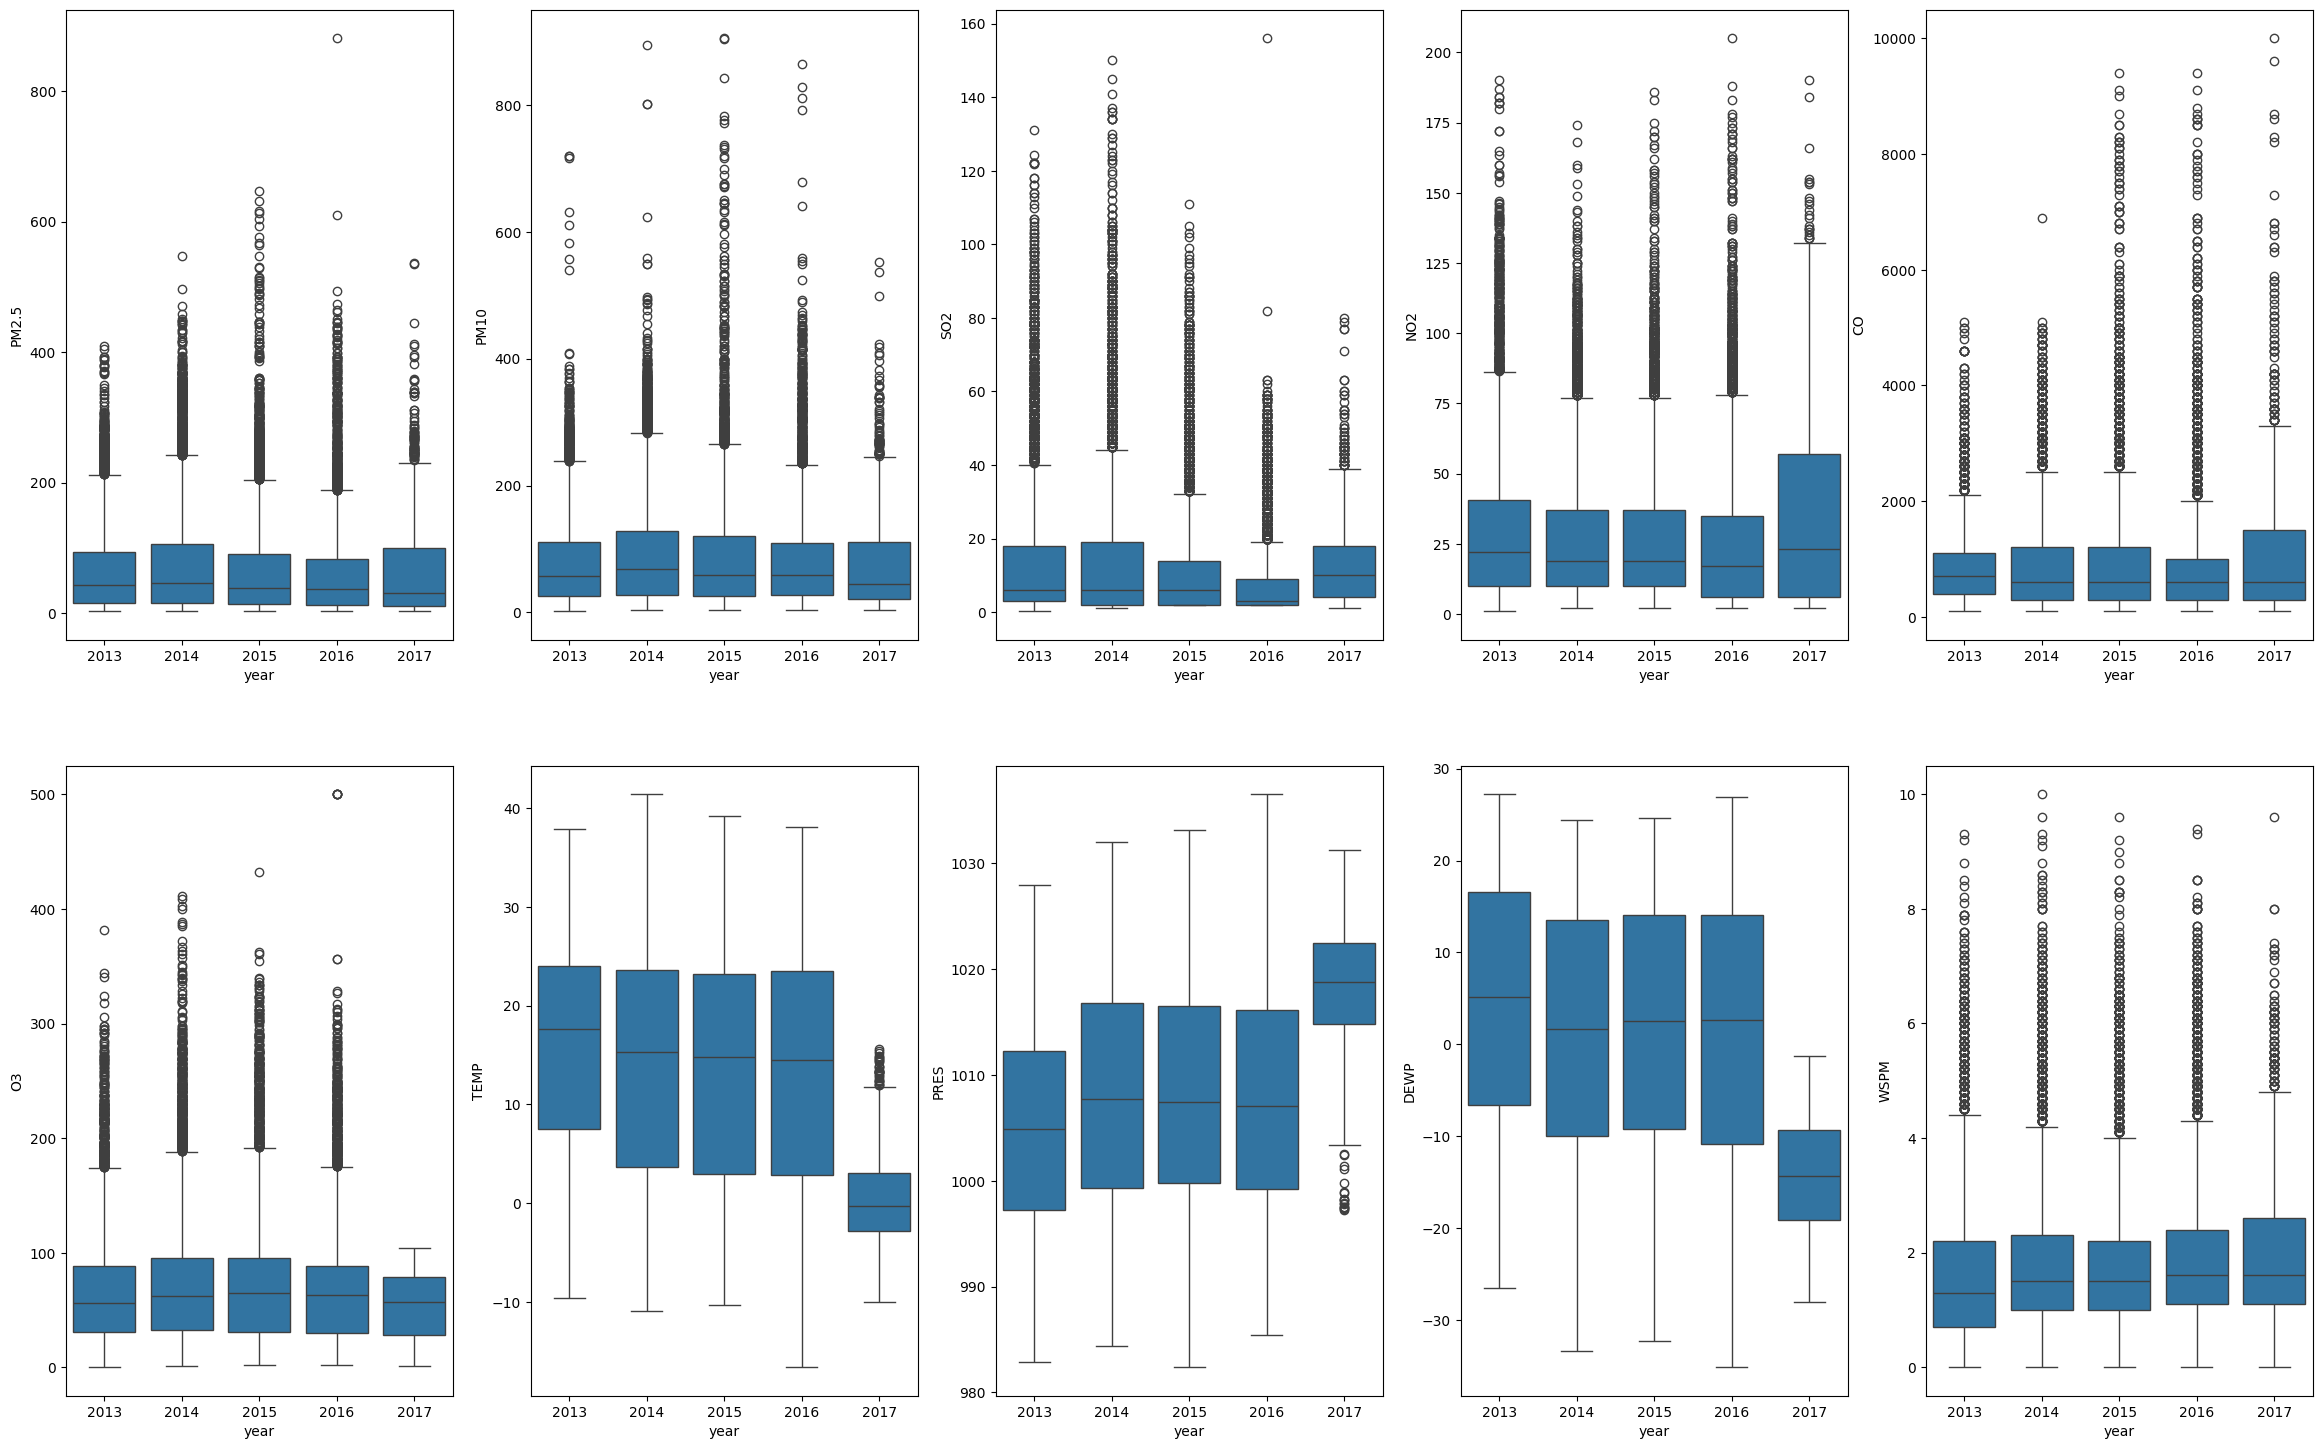

In [61]:
fig,axes =plt.subplots(2,5,figsize=(29,18))
cl =['PM2.5', 'PM10', 'SO2', 'NO2', 'CO','O3', 'TEMP', 'PRES', 'DEWP','WSPM']
# print(axes
k=0
for i in range(2):
    for j in range(5):
        sns.boxplot(x=aq_df['year'],y = aq_df[cl[k]],ax = axes[i][j])
        k+=1

Insights from above graph:
- *PM2.5*, *CO* and *PM10*:  Has highest values in year 2015 suggesting, higher particulate matter in 2015,suggesting poor air quality in 2015.
- *SO2* and *O3* : Has highest values in year 2014.

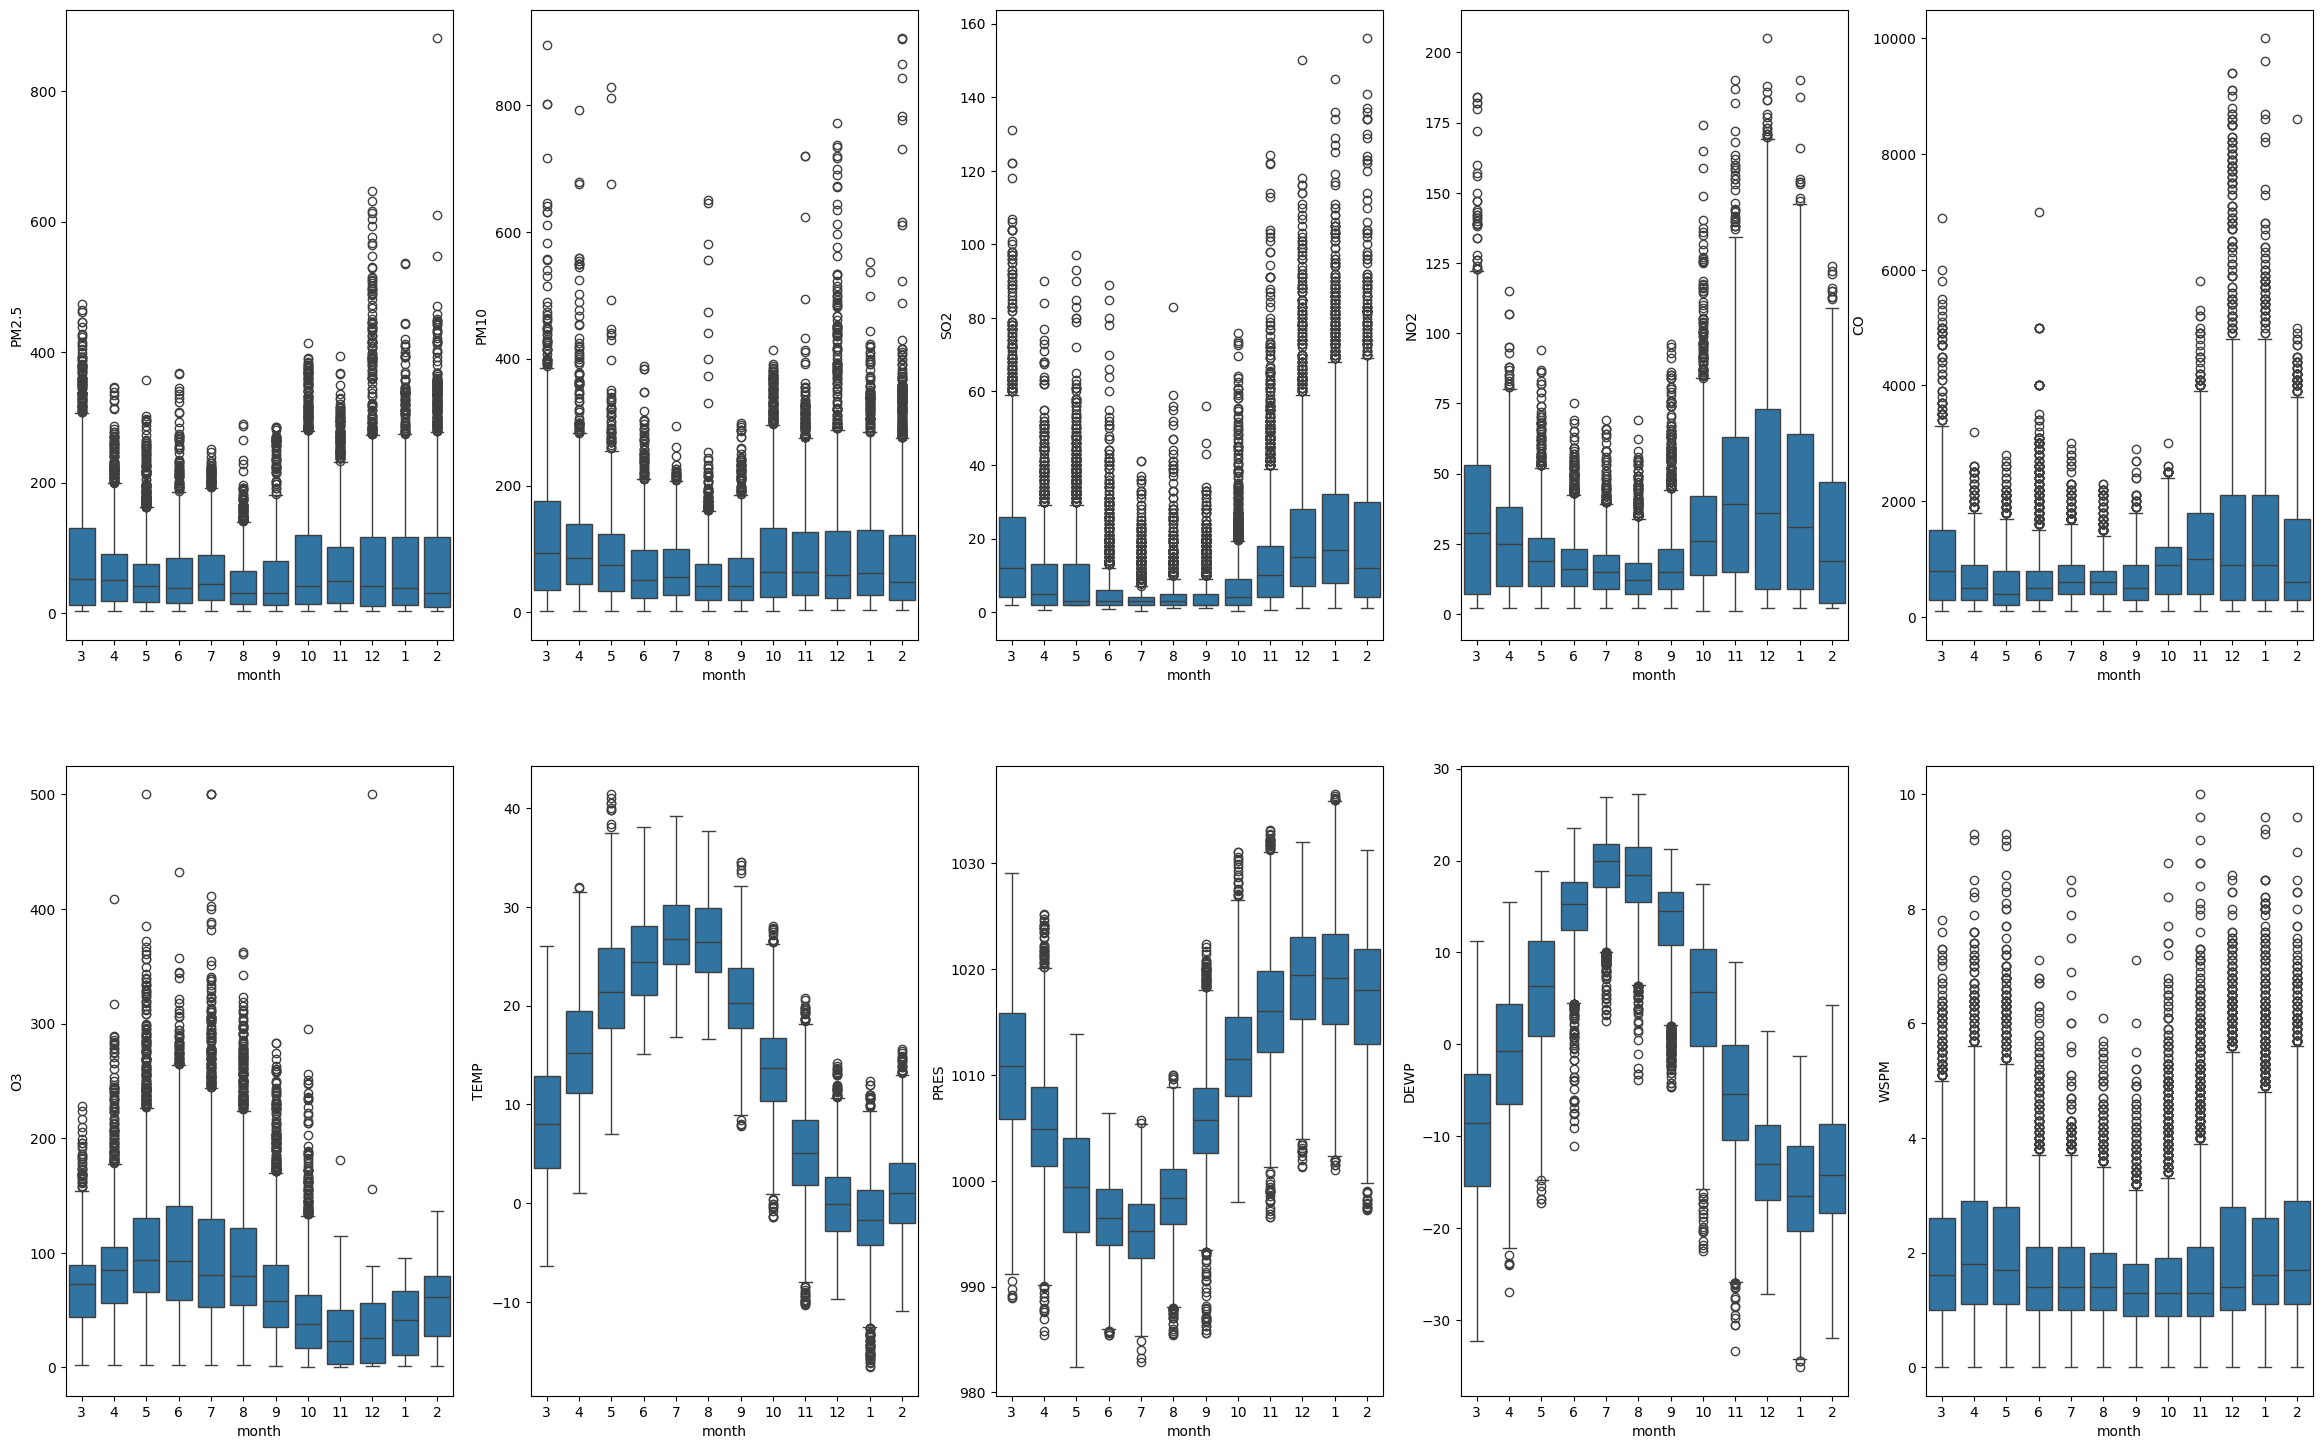

In [62]:
fig,axes =plt.subplots(2,5,figsize=(29,18))
cl =['PM2.5', 'PM10', 'SO2', 'NO2', 'CO','O3', 'TEMP', 'PRES', 'DEWP','WSPM']
# print(axes
k=0
for i in range(2):
    for j in range(5):
        sns.boxplot(x=aq_df['month'],y = aq_df[cl[k]],ax = axes[i][j])
        k+=1

Insights from the above grpah:
- *PM2.5, PM10, SO2,NO2 and CO*: Had higher values in the months of November , December , January and February.
- *O3* : Had higher values in the months from April to August.

### Multivariate Analysis

<Axes: >

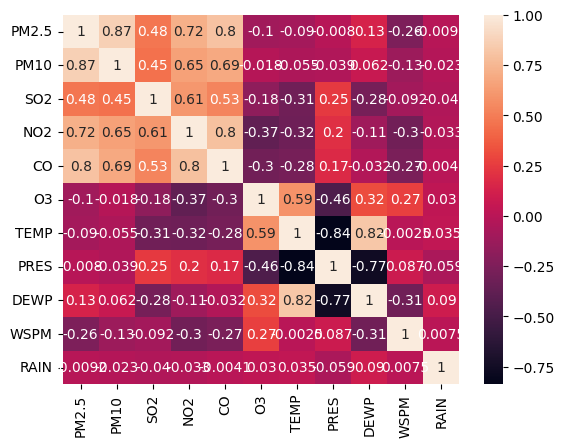

In [63]:
sns.heatmap(aq_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM','RAIN']].corr(),annot=True)

#### Since we are dealing with air quality data , we will consider PM2.5 as the target variable

In [64]:
aq_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM','RAIN']].corr()['PM2.5']

PM2.5    1.000000
PM10     0.868127
SO2      0.475117
NO2      0.718170
CO       0.802737
O3      -0.100542
TEMP    -0.089939
PRES    -0.008005
DEWP     0.134558
WSPM    -0.255714
RAIN    -0.009221
Name: PM2.5, dtype: float64

**CO vs PM2.5**

<Axes: xlabel='CO', ylabel='PM2.5'>

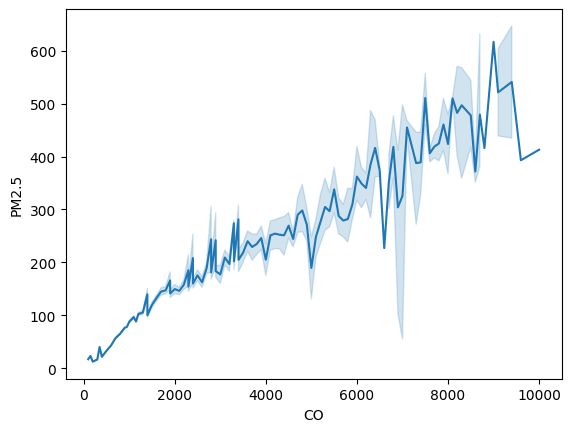

In [65]:
sns.lineplot(x=aq_df['CO'],y=aq_df['PM2.5'])

Insights from the graph:
 - The above graph shows clear linear relationship between CO and PM2.5

<Axes: xlabel='TEMP', ylabel='PM2.5'>

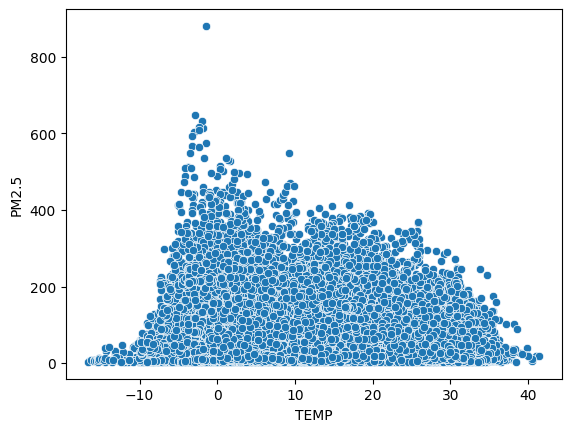

In [66]:
sns.scatterplot(x=aq_df['TEMP'],y=aq_df['PM2.5'])

Insights from the above graph:
- It suggests some non linear relationship between Temperature and PM2.5 

##### Null Value Analysis

In [67]:
round(aq_df.isna().sum() / len(aq_df) * 100,2)

year       0.00
month      0.00
day        0.00
hour       0.00
PM2.5      2.22
PM10       1.87
SO2        2.08
NO2        3.52
CO         5.74
O3         3.46
TEMP       0.15
PRES       0.14
DEWP       0.15
RAIN       0.15
wd         0.40
WSPM       0.12
station    0.00
dtype: float64

Insights form the above graph:
- Highest number of mising/null values is present in O3: 5.74 %
- We will be using forward fill for imputation as abruptly removing the nul values may introduce changes in the pattern learnt by the model. Additionally, when dealing with weather related, features it is industry standard to proceed with such imputation if no other reference for the feature is unavailable.

In [68]:
aq_df_filled = aq_df.ffill()

In [69]:
round(aq_df_filled.isna().sum() / len(aq_df_filled) * 100,2)

year       0.00
month      0.00
day        0.00
hour       0.00
PM2.5      0.00
PM10       0.00
SO2        0.00
NO2        0.01
CO         0.00
O3         0.00
TEMP       0.00
PRES       0.00
DEWP       0.00
RAIN       0.00
wd         0.00
WSPM       0.00
station    0.00
dtype: float64

### Lag Values Anlysis


In [82]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

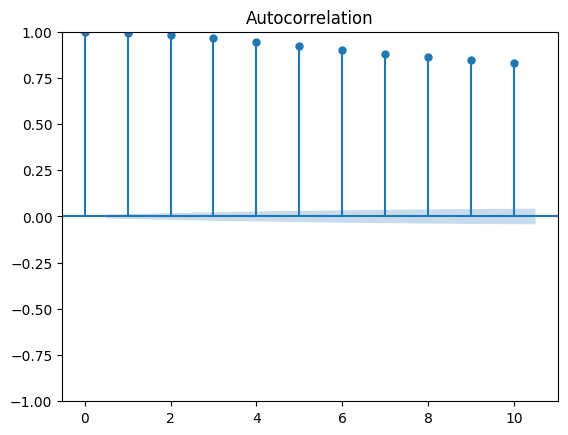

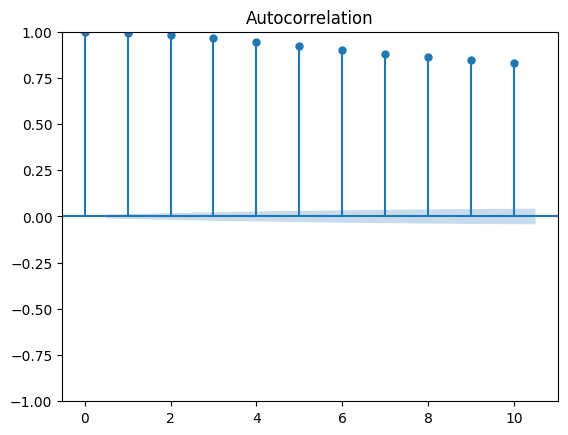

In [83]:
plot_acf(aq_df_filled['TEMP'].values,lags=10)

Insights from the above graph:
- Lag value 6 has the higher correlation values.

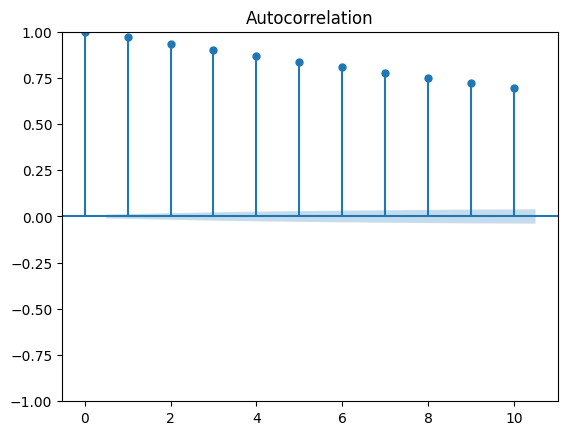

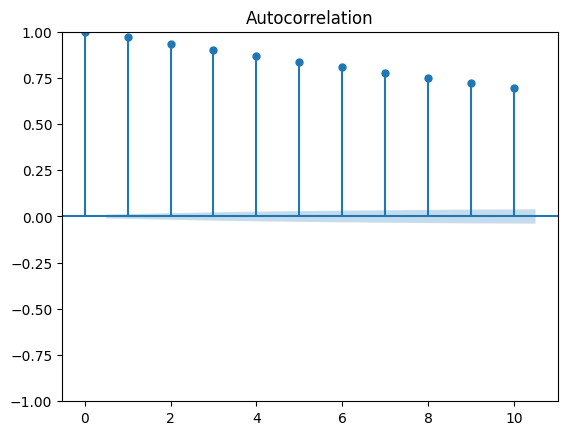

In [84]:
plot_acf(aq_df_filled['PM2.5'].values,lags=10)

Insights from the above graph:
- Lag value 4 has the higher correlation values.